### Curso: CC521 A Programación Evolutiva 2022-1
Alumno: Jordi Joel Bardales Rojas

# Práctica dirigida: Representación y Selección 


In [61]:
from __future__ import annotations
import math
import numpy as np
from enum import Enum
from bin_repr2 import dec2bin, bin2gray, my_map, inverse_map, bin2dec, gray2bin
import copy
import random 
import matplotlib.pyplot as plt
from typing import Callable,  NamedTuple
from itertools import combinations
from abc import ABC, abstractmethod

class Representation(Enum):
    BIN = 0
    GRAY = 1
    DECIMAL = 2

# Problemas de optimización
Este laboratorio se mostrará varios métodos de selección como la selección proporcional, ranking lineal, torneo, uniforme y selección ruleta, luego se medirá la intensidad de selección en un problema de minimización.


## 1. Dado los siguientes problemas de minimización de una función $\min_\mathbf{x}f(\mathbf{x})$


In [2]:
f1 = lambda x: x[0]**4 + 5*x[0]**3 + 4*x[0]**2 - 4*x[0] + 1
f2 = lambda x: 0.2 + x[0]**2 + x[1]**2 - 0.1*math.cos(6*math.pi*x[0]) - 0.1*math.sin(6*math.pi*x[1])
f3 = lambda x: math.pow(1/6.931 - x[0]*x[1]/(x[2]*x[3]), 2)


Dominio

In [3]:
domain_1, n_var_1 = [-4.0, 1], 1
domain_2, n_var_2 = [-1, 1.0], 2
domain_3, n_var_3 = [12, 60.], 4


Parámetros del individuo tipados

In [4]:
class IndividualArguments(NamedTuple):
    domain: tuple[int, int]
    eps: float
    n_var: int
    gen_size: int
    default_repr: Representation = Representation.DECIMAL

Clase individuo 

In [5]:
class Individual():
    def __init__(self, phenotype: list[float], args: IndividualArguments):
        self.domain = args.domain
        self.eps = args.eps
        self.n_var = args.n_var
        self.gen_size = args.gen_size
        self.default_repr = args.default_repr
        self.phenotype = phenotype

    def getGenotype(self, my_repr: Representation = None):
        my_repr = self.default_repr if my_repr == None else my_repr
        list_repr: list[int] = []
        if my_repr == Representation.BIN:
            for gen in self.phenotype:
                list_repr.extend(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps), gen_size=self.gen_size))
        elif my_repr == Representation.GRAY:
            for gen in self.phenotype:
                list_repr.extend(bin2gray(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps), gen_size=self.gen_size)))
        else:
            list_repr = copy.deepcopy(self.phenotype)
        return list_repr

    @classmethod
    def new(cls, genotype, args: IndividualArguments):
        phenotype: list[int] = []
        if args.default_repr == Representation.BIN:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gen), args.domain[0], args.eps))
        elif args.default_repr == Representation.GRAY:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gray2bin(gen)), args.domain[0], args.eps))
        else:
            phenotype = copy.deepcopy(genotype)
        
        return cls(phenotype, args)

    @staticmethod
    def newLike(genotype: list[int], parent: Individual):
        args = IndividualArguments(parent.domain, parent.eps, parent.n_var, parent.gen_size, parent.default_repr)
        return Individual.new(genotype, args)

    @classmethod
    def newRandom(cls, args: IndividualArguments):
        phenotype = [round(random.uniform(args.domain[0], args.domain[1]), 6) for _ in range(args.n_var)]
        return cls(phenotype, args)


### a) Representación del problema (1)
Implemente un programa en python que represente el cromosoma como una cadena binaria de 10 dígitos (10 bits) y muestre/imprima el Fenotipo y su representación binaria para una población de 10 individuos.

In [6]:
POPULATION_SIZE = 10
GEN_SIZE_1 = 10
eps_1 = (domain_1[1] - domain_1[0]) / (2**GEN_SIZE_1 - 1)
N_POINTS_1 = 2**GEN_SIZE_1

args1 = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, f1)

population_1 = [Individual.newRandom(args1) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")


Representación binaria
Genotipo 0 = [1, 0, 0, 0, 1, 1, 0, 0, 0, 0] Fenotipo 0 = [-1.265105]
Genotipo 1 = [1, 1, 0, 1, 0, 1, 0, 1, 0, 1] Fenotipo 1 = [0.170678]
Genotipo 2 = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1] Fenotipo 2 = [-2.716772]
Genotipo 3 = [1, 0, 1, 1, 1, 0, 1, 0, 1, 0] Fenotipo 3 = [-0.351857]
Genotipo 4 = [0, 0, 1, 1, 0, 1, 0, 1, 0, 0] Fenotipo 4 = [-2.965955]
Genotipo 5 = [1, 0, 0, 1, 1, 0, 1, 1, 0, 0] Fenotipo 5 = [-0.969923]
Genotipo 6 = [1, 0, 1, 1, 1, 0, 0, 1, 1, 1] Fenotipo 6 = [-0.368393]
Genotipo 7 = [0, 0, 0, 0, 1, 1, 1, 1, 1, 0] Fenotipo 7 = [-3.696973]
Genotipo 8 = [1, 1, 1, 0, 0, 1, 0, 0, 1, 0] Fenotipo 8 = [0.467906]
Genotipo 9 = [1, 1, 0, 0, 1, 0, 0, 1, 1, 1] Fenotipo 9 = [-0.054469]


Realizar lo mismo del ítem anterior para la representación en código de Gray.

In [7]:
print("Representación en código Gray")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [1, 1, 0, 0, 1, 0, 1, 0, 0, 0] Fenotipo 0 = [-1.265105]
Genotipo 1 = [1, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fenotipo 1 = [0.170678]
Genotipo 2 = [0, 1, 1, 0, 0, 0, 0, 1, 0, 0] Fenotipo 2 = [-2.716772]
Genotipo 3 = [1, 1, 1, 0, 0, 1, 1, 1, 1, 1] Fenotipo 3 = [-0.351857]
Genotipo 4 = [0, 0, 1, 0, 1, 1, 1, 1, 1, 0] Fenotipo 4 = [-2.965955]
Genotipo 5 = [1, 1, 0, 1, 0, 1, 1, 0, 1, 0] Fenotipo 5 = [-0.969923]
Genotipo 6 = [1, 1, 1, 0, 0, 1, 0, 1, 0, 0] Fenotipo 6 = [-0.368393]
Genotipo 7 = [0, 0, 0, 0, 1, 0, 0, 0, 0, 1] Fenotipo 7 = [-3.696973]
Genotipo 8 = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1] Fenotipo 8 = [0.467906]
Genotipo 9 = [1, 0, 1, 0, 1, 1, 0, 1, 0, 0] Fenotipo 9 = [-0.054469]


Considerando las representaciones anteriores (cadena de 10 bits) ¿cual sería el tamaño del espacio intrínseco?


In [8]:
print(f"El espacio intrinseco tendría {N_POINTS_1} elementos con una precisión de {eps_1}")

El espacio intrinseco tendría 1024 elementos con una precisión de 0.004887585532746823


### b) Representación del problema (2):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x, y$ estén representados por 5 bits cada uno y luego muestre/imprima el Fenotipo y su
representación binaria.

In [9]:
POPULATION_SIZE = 10
GEN_SIZE_2 = 5
eps_2 = (domain_2[1] - domain_2[0]) / (2**GEN_SIZE_2 - 1)
N_POINTS_2 = 2**GEN_SIZE_2

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, f2)

population_2 = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [0, 1, 1, 1, 0, 1, 1, 1, 0, 0] Fenotipo 0 = [-0.11803, 0.835948]
Genotipo 1 = [1, 1, 0, 1, 1, 1, 0, 0, 0, 1] Fenotipo 1 = [0.741866, 0.128868]
Genotipo 2 = [1, 1, 1, 0, 0, 0, 1, 0, 1, 1] Fenotipo 2 = [0.785883, -0.299244]
Genotipo 3 = [1, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fenotipo 3 = [0.214026, -0.311262]
Genotipo 4 = [0, 0, 0, 1, 1, 1, 0, 1, 1, 1] Fenotipo 4 = [-0.783799, 0.475144]
Genotipo 5 = [1, 1, 0, 1, 0, 0, 1, 0, 0, 1] Fenotipo 5 = [0.651676, -0.441044]
Genotipo 6 = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1] Fenotipo 6 = [0.183736, 0.901847]
Genotipo 7 = [1, 1, 0, 0, 0, 1, 1, 1, 0, 1] Fenotipo 7 = [0.557723, 0.892128]
Genotipo 8 = [1, 1, 0, 0, 0, 0, 0, 0, 0, 1] Fenotipo 8 = [0.579231, -0.918717]
Genotipo 9 = [1, 0, 0, 0, 1, 1, 1, 0, 0, 0] Fenotipo 9 = [0.099818, 0.555876]


Realizar lo mismo del ítem anterior para la representación en código de Gray

In [10]:
print("Representación en código Gray")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [0, 1, 0, 0, 1, 1, 0, 0, 1, 0] Fenotipo 0 = [-0.11803, 0.835948]
Genotipo 1 = [1, 0, 1, 1, 0, 1, 1, 0, 0, 1] Fenotipo 1 = [0.741866, 0.128868]
Genotipo 2 = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0] Fenotipo 2 = [0.785883, -0.299244]
Genotipo 3 = [1, 1, 0, 1, 0, 0, 1, 1, 1, 0] Fenotipo 3 = [0.214026, -0.311262]
Genotipo 4 = [0, 0, 0, 1, 0, 1, 1, 1, 0, 0] Fenotipo 4 = [-0.783799, 0.475144]
Genotipo 5 = [1, 0, 1, 1, 1, 0, 1, 1, 0, 1] Fenotipo 5 = [0.651676, -0.441044]
Genotipo 6 = [1, 1, 0, 1, 1, 1, 0, 0, 1, 1] Fenotipo 6 = [0.183736, 0.901847]
Genotipo 7 = [1, 0, 1, 0, 0, 1, 0, 0, 1, 1] Fenotipo 7 = [0.557723, 0.892128]
Genotipo 8 = [1, 0, 1, 0, 0, 0, 0, 0, 0, 1] Fenotipo 8 = [0.579231, -0.918717]
Genotipo 9 = [1, 1, 0, 0, 1, 1, 0, 1, 0, 0] Fenotipo 9 = [0.099818, 0.555876]


Realizar lo mismo del ítem anterior para la representación real

In [11]:
print("Representación real")
for i, ind in enumerate(population_2):
    print(f"Individuo {i} = {ind.phenotype}")

Representación real
Individuo 0 = [-0.11803, 0.835948]
Individuo 1 = [0.741866, 0.128868]
Individuo 2 = [0.785883, -0.299244]
Individuo 3 = [0.214026, -0.311262]
Individuo 4 = [-0.783799, 0.475144]
Individuo 5 = [0.651676, -0.441044]
Individuo 6 = [0.183736, 0.901847]
Individuo 7 = [0.557723, 0.892128]
Individuo 8 = [0.579231, -0.918717]
Individuo 9 = [0.099818, 0.555876]


Considerando las representaciones anteriores (cadena de 10 bits y representación real) ¿cual sería el tamaño del espacio intrínseco?


In [12]:
print(f"El espacio intrinseco tendría {N_POINTS_2} x {N_POINTS_2} = {2**(2*GEN_SIZE_2)} elementos con una precisión de {eps_2}")

El espacio intrinseco tendría 32 x 32 = 1024 elementos con una precisión de 0.06451612903225806


### c) Representación del problema (3):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x_1, x_2, x_3, x_4$ estén representados por 6 bits cada uno y luego muestre/imprima el Fenotipo y su representación binaria.


In [13]:
POPULATION_SIZE = 10
GEN_SIZE_3 = 6
eps_3 = (60 - 12) / (2**GEN_SIZE_3 - 1)
N_POINTS_3 = 2**GEN_SIZE_3

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, f3)

population_3 = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0] Fenotipo 0 = [58.531792, 22.624336, 17.989995, 24.521933]
Genotipo 1 = [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0] Fenotipo 1 = [14.018699, 36.841745, 47.453978, 54.911692]
Genotipo 2 = [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0] Fenotipo 2 = [28.620085, 22.197517, 48.443524, 55.827353]
Genotipo 3 = [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0] Fenotipo 3 = [42.481945, 15.252702, 57.88132, 44.224549]
Genotipo 4 = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1] Fenotipo 4 = [25.419657, 54.056878, 34.239004, 39.001091]
Genotipo 5 = [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0] Fenotipo 5 = [37.965212, 44.805708, 22.500942, 34.520341]
Genotipo 6 = [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fenotipo 6 = [45.745537, 39.

Realizar lo mismo del ítem anterior para la representación en código de Gray

In [14]:
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Genotipo 0 = [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0] Fenotipo 0 = [58.531792, 22.624336, 17.989995, 24.521933]
Genotipo 1 = [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0] Fenotipo 1 = [14.018699, 36.841745, 47.453978, 54.911692]
Genotipo 2 = [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1] Fenotipo 2 = [28.620085, 22.197517, 48.443524, 55.827353]
Genotipo 3 = [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1] Fenotipo 3 = [42.481945, 15.252702, 57.88132, 44.224549]
Genotipo 4 = [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0] Fenotipo 4 = [25.419657, 54.056878, 34.239004, 39.001091]
Genotipo 5 = [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1] Fenotipo 5 = [37.965212, 44.805708, 22.500942, 34.520341]
Genotipo 6 = [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0] Fenotipo 6 = [45.745537, 39.595346, 29.462667, 32.8

Realizar lo mismo del ítem anterior para la representación real.

In [15]:
for i, ind in enumerate(population_3):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [58.531792, 22.624336, 17.989995, 24.521933]
Individuo 1 = [14.018699, 36.841745, 47.453978, 54.911692]
Individuo 2 = [28.620085, 22.197517, 48.443524, 55.827353]
Individuo 3 = [42.481945, 15.252702, 57.88132, 44.224549]
Individuo 4 = [25.419657, 54.056878, 34.239004, 39.001091]
Individuo 5 = [37.965212, 44.805708, 22.500942, 34.520341]
Individuo 6 = [45.745537, 39.595346, 29.462667, 32.881191]
Individuo 7 = [17.88347, 24.468322, 20.268404, 22.832478]
Individuo 8 = [22.501575, 58.34047, 30.770315, 38.632341]
Individuo 9 = [26.69494, 25.585734, 46.269316, 50.059239]


Considerando las representaciones anteriores (cadena de bits, representación real) ¿cual seria el tamaño del espacio intrínseco

In [16]:
print(f"El espacio intrinseco tendría {N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}={2**(4*GEN_SIZE_3)} elementos con una precisión de {eps_3}")

El espacio intrinseco tendría 64x64x64x64=16777216 elementos con una precisión de 0.7619047619047619


## 2. Gestión de la población: de la teoría se sabe que los métodos de selección son independientes del método de representación del algoritmo evolutivo, implemente los siguientes métodos de selección en python:

In [17]:
class Selection(ABC):
    @abstractmethod
    def __init__(self, num_individuals: int):
        self.num_individuals = num_individuals

    @abstractmethod
    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pass

    @staticmethod
    def intensity(prev_fitness: list[float], curr_fitness: list[float]):
        prev_fitness = np.array(prev_fitness)
        curr_fitness = np.array(curr_fitness)
        mean_prev = np.mean(prev_fitness)   # f
        mean_curr = np.mean(curr_fitness)   # g
        std_prev = np.std(prev_fitness)     # f 
        return (mean_curr - mean_prev) / std_prev if std_prev != 0.0 else 0.0


De una población de 10 individuos se seleccionarán 5 individuos del problema 2

In [18]:
POPULATION_SIZE = 10
SELECTED_SIZE = 5
args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
fitness_population = [f2(ind.phenotype) for ind in initial_population]
for i, ind in enumerate(initial_population):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [0.820705, -0.696231]
Individuo 1 = [0.647273, -0.153918]
Individuo 2 = [-0.739084, 0.876611]
Individuo 3 = [0.695396, -0.939379]
Individuo 4 = [-0.703664, -0.519942]
Individuo 5 = [-0.583078, -0.16362]
Individuo 6 = [0.775006, 0.263415]
Individuo 7 = [-0.580528, 0.895629]
Individuo 8 = [0.545687, 0.169671]
Individuo 9 = [-0.646129, 0.206387]


### Método de selección proporcional

In [19]:
class ProportionalSelection(Selection):
    def __init__(self, num_individuals: int, delta: float = 0.0):
        super().__init__(num_individuals)
        # fi + 10, fi + 100
        self.delta = delta

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        f_max = max(fitness)
        # individuos con menor fitness (f_max - f) tienen mayor probabilidad de ser seleccionados  
        # presión de selección
        fitness = f_max - np.array(fitness) + 1e-4 + self.delta
        distribution = fitness / fitness.sum()
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [20]:
selected = ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.703664, -0.519942]
Individuo 1 = [0.775006, 0.263415]
Individuo 2 = [-0.646129, 0.206387]
Individuo 3 = [0.820705, -0.696231]
Individuo 4 = [-0.580528, 0.895629]


### Método de selección basada en ranking lineal

In [21]:
class LinearRankingSelection(Selection):
    def __init__(self, num_individuals: int, s: float):
        super().__init__(num_individuals)
        self.s = s

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        mu = len(population)
        pop_fit = zip(population, fitness)
        sorted_pop_fit = sorted(pop_fit, key=lambda val: val[1], reverse=True)
        pop_fit = list(zip(*sorted_pop_fit))
        distribution = [(2 - self.s) / mu + 2 * i * (self.s - 1) / (mu * (mu - 1)) for i in range(mu)]

        return random.choices(pop_fit[0], weights=distribution, k=self.num_individuals)


In [22]:
selected = LinearRankingSelection(num_individuals=SELECTED_SIZE, s=1.5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.646129, 0.206387]
Individuo 1 = [0.775006, 0.263415]
Individuo 2 = [0.820705, -0.696231]
Individuo 3 = [-0.703664, -0.519942]
Individuo 4 = [-0.646129, 0.206387]


### Método de torneo

In [23]:
class TournamentSelection(Selection):
    def __init__(self, num_individuals: int, tournament_size: int):
        super().__init__(num_individuals)
        self.tournament_size = tournament_size

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pop_fit_zipped = list(zip(population, fitness))
        selected: list[Individual] = []
        for _ in range(self.num_individuals):
            candidates = random.choices(pop_fit_zipped, k=self.tournament_size)
            selected.append(min(candidates, key=lambda pop_fit: pop_fit[1])[0])
        return selected


In [24]:
selected = TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.583078, -0.16362]
Individuo 1 = [0.545687, 0.169671]
Individuo 2 = [0.647273, -0.153918]
Individuo 3 = [0.545687, 0.169671]
Individuo 4 = [-0.583078, -0.16362]


### Método de selección uniforme

In [62]:
class UniformSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float] = None):
        # por defecto el metodo choice implementa una distribucion uniforme
        return random.choices(population, k=self.num_individuals) 


In [26]:
selected = UniformSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.775006, 0.263415]
Individuo 1 = [0.775006, 0.263415]
Individuo 2 = [0.775006, 0.263415]
Individuo 3 = [-0.646129, 0.206387]
Individuo 4 = [-0.583078, -0.16362]


### Método de de la ruleta

In [27]:
class RouletteSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        # individuos con menor fitness tienen mayor probabilidad de ser seleccionados
        # presion de seleccion
        f_max = max(fitness)
        fitness = f_max - np.array(fitness) + 1e-4
        distribution = np.array(fitness) / sum(fitness)
        # el metodo de la ruleta es similar a seleccionar elementos de una lista dada una distribucion de probabilidades
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [28]:
selected = RouletteSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.646129, 0.206387]
Individuo 1 = [-0.583078, -0.16362]
Individuo 2 = [0.545687, 0.169671]
Individuo 3 = [-0.646129, 0.206387]
Individuo 4 = [0.545687, 0.169671]


### Operadores de variación

In [29]:
class Crossover:
    def __init__(self, probability: float):
        self.probability = probability

    def make(self, parent1: Individual, parent2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            c1 = copy.deepcopy(parent1.getGenotype())
            c2 = copy.deepcopy(parent2.getGenotype())
            point = random.randint(1, len(c1) - 2)

            c1[point:], c2[point:] = c2[point:], c1[point:]
            return Individual.newLike(c1, parent1), Individual.newLike(c2, parent2)
        return None


class Mutation:
    def __init__(self, probability: float):
        self.probability = probability

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if random.random() < self.probability:
            # punto aleatorio de la cadea
            point = random.randint(0, len(mut) - 1)

            if len(mut) > ind.n_var:
                mut[point] = (mut[point] + 1) % 2
            else:
                mut[point] = random.uniform(ind.domain[0], ind.domain[1])
            return Individual.newLike(mut, ind)
        return None


### Esquema general de un AE genérico 

In [30]:
def genenetic_algorithm(max_generation: int,
                        fitness: Callable[[list[float]], float],
                        population: list[Individual],
                        selection: Selection,
                        crossover: Crossover,
                        mutation: Mutation):
    best: list[Individual] = []
    generation_number = 0
    while generation_number < max_generation:
        generation_number += 1
        # evaluacion de la aptitud de la población inicial (n individuos)
        population_fitness = [fitness(ind.phenotype) for ind in population]
        # seleccion de los padres (para la reproducción)
        parents = selection.get_individuals(population, population_fitness)
        # operadores de variación
        offspring: list[Individual] = []
        # crossover
        for p1, p2 in zip(parents[0::2], parents[1::2]):
            if (childs := crossover.make(p1, p2)) != None:
                offspring += childs
        # mutation
        for ind in parents:
            if (mutant := mutation.make(ind)) != None:
                offspring.append(mutant)
        # evaluacion de la aptitud de los λ descendientes
        offspring_fitness = [fitness(ind.phenotype) for ind in offspring]

        prev_fitness = copy.deepcopy(population_fitness) 
        # λ individuos aptos + n padres
        population += offspring
        population_fitness += offspring_fitness
        # seleccionamos un individuo para la grafica
        best.append(population[random.randint(0, len(population) - 1)])
        # selección del ambiente n
        population = selection.get_individuals(population, population_fitness)
        
        curr_fitness = [fitness(ind.phenotype) for ind in population]
        S = selection.intensity(prev_fitness, curr_fitness)      
        
        # impresión de la generación
        if generation_number % int(max_generation / 10) == 0:
            print(f"Generación: {generation_number}, número de descendientes: {len(offspring)}, intensidad: {S}")

    plt.plot([fitness(x.phenotype) for x in best], "r-")
    plt.title(f"Generation number {generation_number} with {selection.__class__.__name__}")
    plt.ylabel("Fitness")
    plt.xlabel("Generation")
    plt.show()
    return best


## 3. Evaluación de la intensidad de selección: para los problemas planteados en la pregunta (1) evaluar la presión de selección considerando los siguientes casos.
**Importante**: El número de descendientes está dado de manera probabiliística por los operadores de variación, por lo que es complicado establecer un número fijo de descendientes, sin embargo, tendrá el casi el mismo número según la cantidad de padres que se apareen, pues si son 10 padres, cada 2 parejas pueden tener 2 hijos, habrá alrededor de 8, 9 o 10 descendientes.


#### a) Para el primer caso (ecuación 1) considerar la representación binaria, una población inicial 15 individuos del cual debe seleccionar 10 padres y crear 10 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 15 individuos)


Generación: 1, número de descendientes: 4, intensidad: -0.8334988923215547
Generación: 2, número de descendientes: 6, intensidad: -0.862089355016265
Generación: 3, número de descendientes: 10, intensidad: -0.4948468726599886
Generación: 4, número de descendientes: 6, intensidad: -1.25
Generación: 5, número de descendientes: 10, intensidad: -0.6546536707080964
Generación: 6, número de descendientes: 8, intensidad: 0.0
Generación: 7, número de descendientes: 8, intensidad: 0.0
Generación: 8, número de descendientes: 10, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


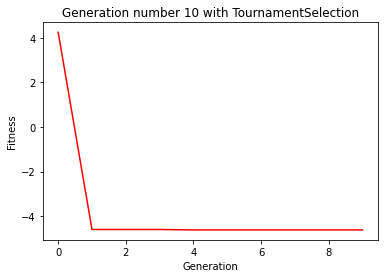

In [63]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 15
SELECTED_SIZE = 10
# NOTA: El número de descendientes está dado de manera estocástica según los operadores de variación, así que es complicado establecer un número fijo de descendientes
# sin embargo rondará los 10 individuos.
OFFSPRING_SIZE = 10 
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, Representation.GRAY)
initial_population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]

# PIPELINE GA TOURNAMENT SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=3),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).

In [64]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Tournament Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Tournament Selection
 x* = [-2.768328445747801], f(x*) = -4.618098142039013


Generación: 1, número de descendientes: 6, intensidad: -0.7536458538528641
Generación: 2, número de descendientes: 8, intensidad: -0.4299798609122943
Generación: 3, número de descendientes: 8, intensidad: -0.23625926326217447
Generación: 4, número de descendientes: 6, intensidad: 0.2103508700833272
Generación: 5, número de descendientes: 8, intensidad: 0.008315772784974768
Generación: 6, número de descendientes: 2, intensidad: -0.08526237305278297
Generación: 7, número de descendientes: 8, intensidad: -0.23432474863123884
Generación: 8, número de descendientes: 10, intensidad: 0.4419629044123442
Generación: 9, número de descendientes: 8, intensidad: -0.041620509225928026
Generación: 10, número de descendientes: 8, intensidad: 0.24999999999999814


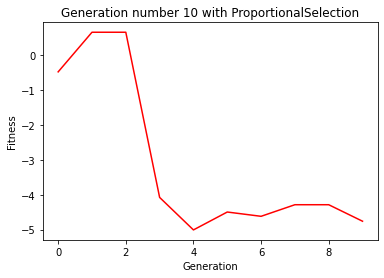

In [65]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [66]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [-2.929618768328446], f(x*) = -5.008401406075471


Generación: 1, número de descendientes: 8, intensidad: -0.8171755122215169
Generación: 2, número de descendientes: 8, intensidad: -0.9430661729732551
Generación: 3, número de descendientes: 10, intensidad: -0.4495759354400905
Generación: 4, número de descendientes: 10, intensidad: -1.1440152972100193
Generación: 5, número de descendientes: 8, intensidad: -0.8211531716880219
Generación: 6, número de descendientes: 10, intensidad: -0.2861371120649683
Generación: 7, número de descendientes: 10, intensidad: -0.33333333333333653
Generación: 8, número de descendientes: 6, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


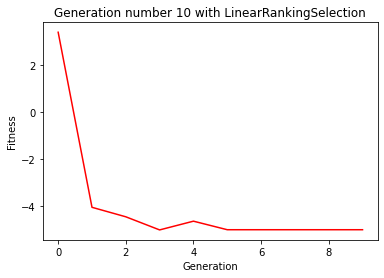

In [67]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [68]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [-2.929618768328446], f(x*) = -5.008401406075471


Generación: 1, número de descendientes: 8, intensidad: -0.04177427113814402
Generación: 2, número de descendientes: 6, intensidad: 0.7251357235701197
Generación: 3, número de descendientes: 11, intensidad: 0.05987936756855863
Generación: 4, número de descendientes: 10, intensidad: -0.6722219591306918
Generación: 5, número de descendientes: 8, intensidad: -0.4698877294058413
Generación: 6, número de descendientes: 8, intensidad: -0.4240228194324576
Generación: 7, número de descendientes: 8, intensidad: -0.22260238115421846
Generación: 8, número de descendientes: 6, intensidad: 0.43981685963921824
Generación: 9, número de descendientes: 6, intensidad: -0.7989609375333508
Generación: 10, número de descendientes: 10, intensidad: 0.33072502075843957


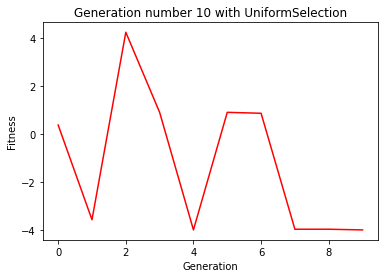

In [69]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [70]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Uniform Selection
 x* = [-2.6412512218963835], f(x*) = -3.992274492679609


Generación: 1, número de descendientes: 8, intensidad: -0.49509497486023807
Generación: 2, número de descendientes: 10, intensidad: -0.6095278013579036
Generación: 3, número de descendientes: 8, intensidad: -0.6049194317549328
Generación: 4, número de descendientes: 9, intensidad: -0.32809576090206993
Generación: 5, número de descendientes: 10, intensidad: -0.334051884815982
Generación: 6, número de descendientes: 10, intensidad: -0.2642156689911902
Generación: 7, número de descendientes: 8, intensidad: -0.33333333333326115
Generación: 8, número de descendientes: 10, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 10, intensidad: 0.0


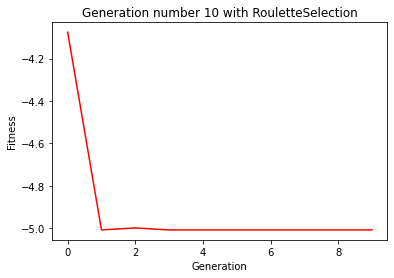

In [71]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [72]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Roulette Selection
 x* = [-2.929618768328446], f(x*) = -5.008401406075471


#### b) Para el segundo caso (ecuación 2) considerar la representación Gray, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 14, intensidad: -1.2627540606213101
Generación: 2, número de descendientes: 12, intensidad: -1.2563030392034846
Generación: 3, número de descendientes: 8, intensidad: -0.6647333631237905
Generación: 4, número de descendientes: 11, intensidad: 0.0
Generación: 5, número de descendientes: 10, intensidad: 0.0
Generación: 6, número de descendientes: 12, intensidad: 0.0
Generación: 7, número de descendientes: 15, intensidad: 0.0
Generación: 8, número de descendientes: 11, intensidad: 0.0
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


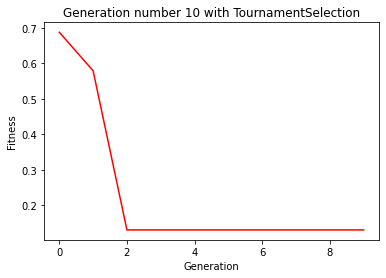

In [41]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))



In [42]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value
 x* = [-0.032258064516129004, -0.29032258064516125], f(x*) = 0.13077216071515316


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 10, intensidad: 0.0015817783940394376
Generación: 2, número de descendientes: 14, intensidad: -0.10939965189753828
Generación: 3, número de descendientes: 12, intensidad: -0.022260237544607146
Generación: 4, número de descendientes: 10, intensidad: 0.052405861663467224
Generación: 5, número de descendientes: 10, intensidad: -0.09843016215070347
Generación: 6, número de descendientes: 12, intensidad: -0.35152697769279134
Generación: 7, número de descendientes: 10, intensidad: 0.03054769794152247
Generación: 8, número de descendientes: 12, intensidad: 0.10439843008352001
Generación: 9, número de descendientes: 13, intensidad: 0.03403075448686616
Generación: 10, número de descendientes: 10, intensidad: 0.08790823565440532


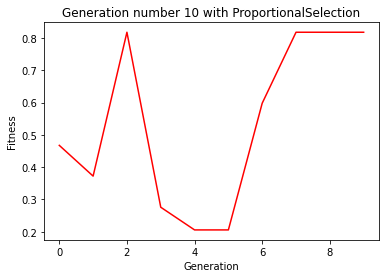

In [43]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [44]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [-0.032258064516129004, 0.35483870967741926], f(x*) = 0.20543916297980327


Generación: 1, número de descendientes: 12, intensidad: -0.9335488124789252
Generación: 2, número de descendientes: 12, intensidad: -0.6933668074636355
Generación: 3, número de descendientes: 12, intensidad: -0.8677564240864941
Generación: 4, número de descendientes: 14, intensidad: -0.6224030537349386
Generación: 5, número de descendientes: 14, intensidad: -0.42897865998233725
Generación: 6, número de descendientes: 12, intensidad: -0.6666666666666672
Generación: 7, número de descendientes: 14, intensidad: -1.0690449676497014
Generación: 8, número de descendientes: 12, intensidad: 0.0
Generación: 9, número de descendientes: 9, intensidad: 0.0
Generación: 10, número de descendientes: 10, intensidad: 0.0


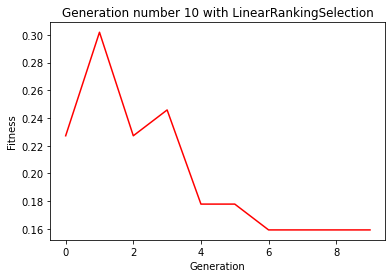

In [45]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [46]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [0.29032258064516125, 0.032258064516129004], f(x*) = 0.15930427014174514


Generación: 1, número de descendientes: 12, intensidad: -0.2442139451458722
Generación: 2, número de descendientes: 12, intensidad: -0.05359419843243513
Generación: 3, número de descendientes: 12, intensidad: 0.3676372926677628
Generación: 4, número de descendientes: 12, intensidad: -0.167919793988968
Generación: 5, número de descendientes: 12, intensidad: -0.15062362609267713
Generación: 6, número de descendientes: 14, intensidad: -0.21741141552461354
Generación: 7, número de descendientes: 14, intensidad: -0.02678102203075937
Generación: 8, número de descendientes: 10, intensidad: 0.008182568107800586
Generación: 9, número de descendientes: 9, intensidad: -0.27058625857944035
Generación: 10, número de descendientes: 12, intensidad: -0.1961161351381819


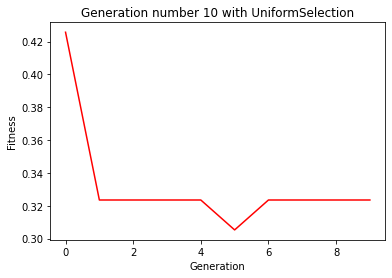

In [47]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [48]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [0.35483870967741926, 0.16129032258064502], f(x*) = 0.2499124646829377


Generación: 1, número de descendientes: 14, intensidad: -0.6372241333552771
Generación: 2, número de descendientes: 10, intensidad: -0.7845402017537675
Generación: 3, número de descendientes: 13, intensidad: -0.4826054103515602
Generación: 4, número de descendientes: 9, intensidad: -0.12359960828198009
Generación: 5, número de descendientes: 12, intensidad: -0.8182585447203494
Generación: 6, número de descendientes: 14, intensidad: -0.49999999999999983
Generación: 7, número de descendientes: 14, intensidad: 0.0
Generación: 8, número de descendientes: 11, intensidad: -1823050733205674.0
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 10, intensidad: 0.0


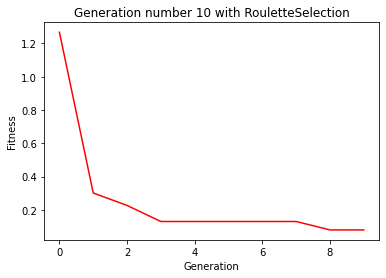

In [49]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [50]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [-0.032258064516129004, -0.22580645161290325], f(x*) = 0.08017233823853531


#### c) Para el tercer caso (ecuación 3) considerar la representación real, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 15, intensidad: -0.5943826809177005
Generación: 2, número de descendientes: 12, intensidad: -1.0316431147252905
Generación: 3, número de descendientes: 11, intensidad: -0.3473138753699337
Generación: 4, número de descendientes: 12, intensidad: 0.0
Generación: 5, número de descendientes: 10, intensidad: 0.0
Generación: 6, número de descendientes: 14, intensidad: 0.0
Generación: 7, número de descendientes: 12, intensidad: 0.0
Generación: 8, número de descendientes: 12, intensidad: 0.0
Generación: 9, número de descendientes: 14, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


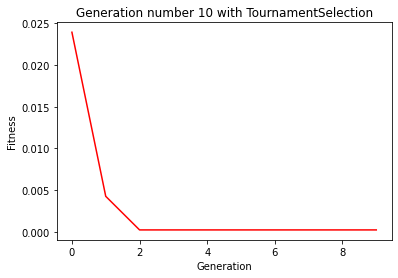

In [51]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, Representation.DECIMAL)
initial_population = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [52]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value
 x* = [28.411853, 16.468902, 55.565829, 53.038493], f(x*) = 0.00020994561301624094


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 12, intensidad: 0.07329569479690562
Generación: 2, número de descendientes: 12, intensidad: -0.002846635607259363
Generación: 3, número de descendientes: 14, intensidad: -0.15802504784754542
Generación: 4, número de descendientes: 8, intensidad: -0.2770598913486657
Generación: 5, número de descendientes: 14, intensidad: -0.12773715060274737
Generación: 6, número de descendientes: 8, intensidad: -0.24562484923208414
Generación: 7, número de descendientes: 14, intensidad: -0.38481725557682395
Generación: 8, número de descendientes: 12, intensidad: -0.17885772039046208
Generación: 9, número de descendientes: 14, intensidad: 0.03767744574431897
Generación: 10, número de descendientes: 10, intensidad: 0.015195366433051838


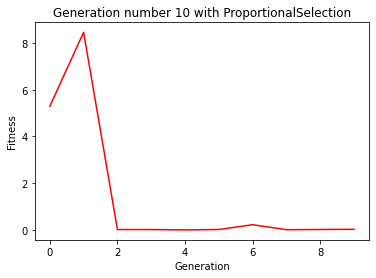

In [53]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [54]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [28.411853, 16.468902, 49.085934, 47.369187], f(x*) = 0.003244355173789757


Generación: 1, número de descendientes: 12, intensidad: -0.4025892749240362
Generación: 2, número de descendientes: 12, intensidad: -0.5172936259314035
Generación: 3, número de descendientes: 12, intensidad: -0.9835933293731841
Generación: 4, número de descendientes: 10, intensidad: -0.37602932053867766
Generación: 5, número de descendientes: 6, intensidad: 0.0
Generación: 6, número de descendientes: 12, intensidad: 0.0
Generación: 7, número de descendientes: 12, intensidad: 0.0
Generación: 8, número de descendientes: 14, intensidad: 0.0
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


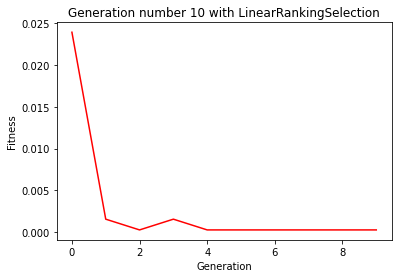

In [55]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [56]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [22.933407, 16.468902, 55.565829, 53.038493], f(x*) = 0.0002600062687030141


Generación: 1, número de descendientes: 14, intensidad: 0.01670428134436957
Generación: 2, número de descendientes: 10, intensidad: -0.3249826945388999
Generación: 3, número de descendientes: 10, intensidad: -0.33615395808091264
Generación: 4, número de descendientes: 12, intensidad: 0.8535870903690458
Generación: 5, número de descendientes: 12, intensidad: -0.013005901165758215
Generación: 6, número de descendientes: 10, intensidad: 0.18286368425851582
Generación: 7, número de descendientes: 12, intensidad: -0.47121469748628736
Generación: 8, número de descendientes: 10, intensidad: 0.2774834230837222
Generación: 9, número de descendientes: 12, intensidad: -0.06729080078468402
Generación: 10, número de descendientes: 12, intensidad: -0.22869229857936244


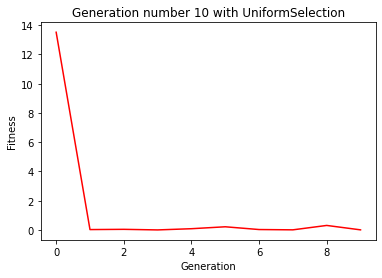

In [57]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [58]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [28.085732, 16.468902, 50.665826, 40.596886143213766], f(x*) = 0.0064957768210947165


Generación: 1, número de descendientes: 12, intensidad: -0.300216602711761
Generación: 2, número de descendientes: 12, intensidad: -0.12522869000165823
Generación: 3, número de descendientes: 12, intensidad: -0.18253400028407407
Generación: 4, número de descendientes: 12, intensidad: -0.29903546682331406
Generación: 5, número de descendientes: 11, intensidad: -0.1327854561216968
Generación: 6, número de descendientes: 14, intensidad: -0.39370953627448935
Generación: 7, número de descendientes: 10, intensidad: -0.273286961706035
Generación: 8, número de descendientes: 10, intensidad: -0.634721594401119
Generación: 9, número de descendientes: 12, intensidad: -0.3830698849162518
Generación: 10, número de descendientes: 10, intensidad: -0.6030226891555273


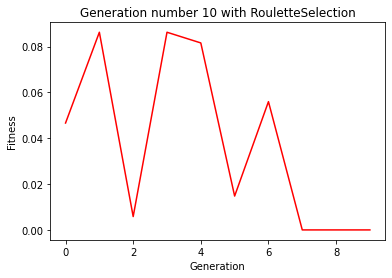

In [59]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=Crossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [60]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [24.876751, 17.274575, 55.565829, 53.038493], f(x*) = 2.3581483532719106e-06
